# Import and Explore

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Load the dataset
df = pd.read_csv(r'c:\Users\liksh\Desktop\Airline Review.csv', index_col=0)

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
df.head()

Dataset loaded successfully!
Shape: (23171, 19)

First few rows:


,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


# Transform Route into Origin, Destination, and Stop

In [26]:
# Route Column Transformation
import re

def parse_route(route_str):
    """
    Parse route string into origin, destination, and via components
    
    Examples:
    - "Frankfurt to Pristina" -> origin: Frankfurt, destination: Pristina, via: None
    - "Sofia to Amsterdam via Ljubljana" -> origin: Sofia, destination: Amsterdam, via: Ljubljana
    """
    if pd.isna(route_str):
        return None, None, None
    
    route_str = str(route_str).strip()
    
    # Check if route contains "via"
    if " via " in route_str.lower():
        # Split by "via" first
        main_route, via_part = route_str.split(" via ", 1)
        via_city = via_part.strip()
        
        # Split main route by "to"
        if " to " in main_route.lower():
            origin, destination = main_route.split(" to ", 1)
            return origin.strip(), destination.strip(), via_city
        else:
            return route_str, None, None
    
    elif " to " in route_str.lower():
        # Direct route without via
        parts = route_str.split(" to ", 1)
        if len(parts) == 2:
            return parts[0].strip(), parts[1].strip(), None
        else:
            return route_str, None, None
    
    else:
        # Single location or unrecognized format
        return route_str, None, None

# Apply the transformation
print("🔄 Transforming Route column into Origin, Destination, and Via columns...")
print("=" * 60)

# Create a copy of the original dataframe for the cleaned version
df_clean = df.copy()

# Create new columns
route_data = df_clean['Route'].apply(parse_route)
df_clean['Origin'] = [x[0] for x in route_data]
df_clean['Destination'] = [x[1] for x in route_data]
df_clean['Via'] = [x[2] for x in route_data]

# Display statistics
print("📊 ROUTE TRANSFORMATION RESULTS:")
print("-" * 40)

total_routes = len(df_clean[df_clean['Route'].notna()])
parsed_routes = len(df_clean[df_clean['Origin'].notna()])
direct_routes = len(df_clean[df_clean['Via'].isna() & df_clean['Origin'].notna()])
via_routes = len(df_clean[df_clean['Via'].notna()])

print(f"Total routes with data: {total_routes:,}")
print(f"Successfully parsed: {parsed_routes:,} ({parsed_routes/total_routes*100:.1f}%)")
print(f"Direct routes (Origin → Destination): {direct_routes:,} ({direct_routes/parsed_routes*100:.1f}%)")
print(f"Routes with stopovers (Via): {via_routes:,} ({via_routes/parsed_routes*100:.1f}%)")

# Show examples of parsed routes
print(f"\n📋 SAMPLE PARSED ROUTES:")
print("-" * 40)

# Examples of direct routes
direct_examples = df_clean[df_clean['Via'].isna() & df_clean['Origin'].notna()][['Route', 'Origin', 'Destination']].head(5)
print("Direct Routes:")
for _, row in direct_examples.iterrows():
    print(f"  '{row['Route']}' → Origin: {row['Origin']}, Destination: {row['Destination']}")

print()

# Examples of routes with via
if via_routes > 0:
    via_examples = df_clean[df_clean['Via'].notna()][['Route', 'Origin', 'Destination', 'Via']].head(5)
    print("Routes with Stopovers:")
    for _, row in via_examples.iterrows():
        print(f"  '{row['Route']}' → Origin: {row['Origin']}, Destination: {row['Destination']}, Via: {row['Via']}")

# Show most common origins and destinations
print(f"\n🌍 TOP 10 ORIGINS:")
print("-" * 40)
top_origins = df_clean['Origin'].value_counts().head(10)
for i, (origin, count) in enumerate(top_origins.items(), 1):
    print(f"{i:2d}. {origin}: {count:,} routes")

print(f"\n🎯 TOP 10 DESTINATIONS:")
print("-" * 40)
top_destinations = df_clean['Destination'].value_counts().head(10)
for i, (destination, count) in enumerate(top_destinations.items(), 1):
    print(f"{i:2d}. {destination}: {count:,} routes")

if via_routes > 0:
    print(f"\n✈️ TOP 10 STOPOVER CITIES (VIA):")
    print("-" * 40)
    top_via = df_clean['Via'].value_counts().head(10)
    for i, (via, count) in enumerate(top_via.items(), 1):
        print(f"{i:2d}. {via}: {count:,} routes")

print(f"\n✅ Route transformation completed successfully!")
print("New columns added to df_clean: 'Origin', 'Destination', 'Via'")

🔄 Transforming Route column into Origin, Destination, and Via columns...
📊 ROUTE TRANSFORMATION RESULTS:
----------------------------------------
Total routes with data: 19,343
Successfully parsed: 19,343 (100.0%)
Direct routes (Origin → Destination): 15,141 (78.3%)
Routes with stopovers (Via): 4,202 (21.7%)

📋 SAMPLE PARSED ROUTES:
----------------------------------------
Direct Routes:
  'Moroni to Moheli' → Origin: Moroni, Destination: Moheli
  'Moroni to Anjouan' → Origin: Moroni, Destination: Anjouan
  'Anjouan to Dzaoudzi' → Origin: Anjouan, Destination: Dzaoudzi
  'Frankfurt to Pristina' → Origin: Frankfurt, Destination: Pristina
  'Sarajevo to Ljubljana' → Origin: Sarajevo, Destination: Ljubljana

Routes with Stopovers:
  'Sofia to Amsterdam via Ljubljana' → Origin: Sofia, Destination: Amsterdam, Via: Ljubljana
  'Pristina to Zürich via Ljubliana' → Origin: Pristina, Destination: Zürich, Via: Ljubliana
  'Paris to Skopje via Ljubljana' → Origin: Paris, Destination: Skopje, Via:

In [13]:
print("DataFrame columns:")
print(df_clean.columns.tolist())
print("\nDataFrame shape:", df_clean.shape)
print("\nFirst few rows:")
df_clean.head()

DataFrame columns:
['Airline Name', 'Overall_Rating', 'Review_Title', 'Review Date', 'Verified', 'Review', 'Aircraft', 'Type Of Traveller', 'Seat Type', 'Route', 'Date Flown', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money', 'Recommended', 'Origin', 'Destination', 'Via', 'Origin_Region', 'Overall_Rating_Numeric', 'Distance_km', 'RouteType', 'Route_Key']

DataFrame shape: (23171, 27)

First few rows:


,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,Origin,Destination,Via,Origin_Region,Overall_Rating_Numeric,Distance_km,RouteType,Route_Key
0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes,Moroni,Moheli,None,Other,9.0,None,None,"(Moroni, Moheli, None)"
1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no,Moroni,Anjouan,None,Other,1.0,None,None,"(Moroni, Anjouan, None)"
2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no,Anjouan,Dzaoudzi,None,Other,1.0,None,None,"(Anjouan, Dzaoudzi, None)"
3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no,Frankfurt,Pristina,None,Europe,1.0,None,None,"(Frankfurt, Pristina, None)"
4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,Sofia,Amsterdam,Ljubljana,Europe,1.0,None,None,"(Sofia, Amsterdam, Ljubljana)"


# Classify Data Entry into Regions based on Origin using APIs

In [28]:
# Geographic Region Classification based on Origin
def classify_region_by_origin(origin):
    """
    Classify origin city/airport into geographic regions
    Based on comprehensive geographic knowledge of major cities and airports
    """
    if pd.isna(origin):
        return 'Other'
    
    origin_upper = str(origin).upper().strip()
    
    # Asia
    asia_locations = [
        # East Asia
        'TOKYO', 'OSAKA', 'NAGOYA', 'FUKUOKA', 'SAPPORO', 'SENDAI', 'NRT', 'HND', 'KIX',
        'SEOUL', 'BUSAN', 'ICN', 'GMP',
        'BEIJING', 'SHANGHAI', 'GUANGZHOU', 'SHENZHEN', 'CHENGDU', 'HONG KONG', 'PEK', 'PVG', 'CAN', 'HKG',
        'TAIPEI', 'KAOHSIUNG', 'TPE',
        
        # Southeast Asia
        'SINGAPORE', 'SIN',
        'BANGKOK', 'PHUKET', 'CHIANG MAI', 'BKK', 'HKT',
        'KUALA LUMPUR', 'PENANG', 'KOTA KINABALU', 'KUL', 'PEN',
        'JAKARTA', 'BALI', 'DENPASAR', 'SURABAYA', 'CGK', 'DPS',
        'MANILA', 'CEBU', 'MNL', 'CEB',
        'HO CHI MINH', 'HANOI', 'SGN', 'HAN',
        'PHNOM PENH', 'PNH',
        'YANGON', 'RGN',
        'VIENTIANE', 'VTE',
        'BRUNEI', 'BWN',
        
        # South Asia
        'MUMBAI', 'DELHI', 'BANGALORE', 'CHENNAI', 'KOLKATA', 'HYDERABAD', 'PUNE', 'AHMEDABAD', 'BOM', 'DEL', 'BLR', 'MAA', 'CCU', 'HYD',
        'KARACHI', 'LAHORE', 'ISLAMABAD', 'KHI', 'LHE', 'ISB',
        'DHAKA', 'DAC',
        'COLOMBO', 'CMB',
        'KATHMANDU', 'KTM',
        'MALE', 'MLE',
        
        # Central Asia
        'ALMATY', 'ASTANA', 'ALA', 'TSE',
        'TASHKENT', 'TAS',
        'BISHKEK', 'FRU'
    ]
    
    # Europe
    europe_locations = [
        # Western Europe
        'LONDON', 'MANCHESTER', 'BIRMINGHAM', 'GLASGOW', 'EDINBURGH', 'LHR', 'LGW', 'STN', 'LTN', 'MAN', 'BHX', 'GLA', 'EDI',
        'PARIS', 'LYON', 'MARSEILLE', 'NICE', 'TOULOUSE', 'CDG', 'ORY', 'LYS', 'MRS', 'NCE', 'TLS',
        'FRANKFURT', 'MUNICH', 'BERLIN', 'HAMBURG', 'COLOGNE', 'DÜSSELDORF', 'STUTTGART', 'FRA', 'MUC', 'TXL', 'SXF', 'HAM', 'CGN', 'DUS', 'STR',
        'AMSTERDAM', 'ROTTERDAM', 'AMS', 'RTM',
        'MADRID', 'BARCELONA', 'VALENCIA', 'SEVILLE', 'BILBAO', 'MAD', 'BCN', 'VLC', 'SVQ', 'BIO',
        'ROME', 'MILAN', 'NAPLES', 'VENICE', 'TURIN', 'FLORENCE', 'FCO', 'CIA', 'MXP', 'LIN', 'NAP', 'VCE', 'TRN', 'FLR',
        'ZURICH', 'GENEVA', 'BASEL', 'ZUR', 'GVA', 'BSL',
        'VIENNA', 'SALZBURG', 'VIE', 'SZG',
        'BRUSSELS', 'ANTWERP', 'BRU', 'ANR',
        'LISBON', 'PORTO', 'LIS', 'OPO',
        'DUBLIN', 'CORK', 'DUB', 'ORK',
        
        # Northern Europe
        'STOCKHOLM', 'GÖTEBORG', 'MALMÖ', 'ARN', 'GOT', 'MMX',
        'COPENHAGEN', 'AARHUS', 'CPH', 'AAR',
        'OSLO', 'BERGEN', 'TRONDHEIM', 'OSL', 'BGO', 'TRD',
        'HELSINKI', 'TAMPERE', 'HEL', 'TMP',
        'REYKJAVIK', 'KEF',
        
        # Eastern Europe
        'MOSCOW', 'ST PETERSBURG', 'NOVOSIBIRSK', 'YEKATERINBURG', 'SVO', 'DME', 'VKO', 'LED', 'OVB', 'SVX',
        'WARSAW', 'KRAKOW', 'GDANSK', 'WAW', 'KRK', 'GDN',
        'PRAGUE', 'BRNO', 'PRG', 'BRQ',
        'BUDAPEST', 'BUD',
        'BUCHAREST', 'OTP',
        'SOFIA', 'SOF',
        'ZAGREB', 'ZAG',
        'LJUBLJANA', 'LJU',
        'BELGRADE', 'BEG',
        'SARAJEVO', 'SJJ',
        'SKOPJE', 'SKP',
        'PRISTINA', 'PRN',
        'ATHENS', 'THESSALONIKI', 'ATH', 'SKG'
    ]
    
    # Australia/Oceania
    australia_locations = [
        'SYDNEY', 'MELBOURNE', 'BRISBANE', 'PERTH', 'ADELAIDE', 'DARWIN', 'CAIRNS', 'GOLD COAST', 'HOBART', 'CANBERRA',
        'SYD', 'MEL', 'BNE', 'PER', 'ADL', 'DRW', 'CNS', 'OOL', 'HBA', 'CBR',
        'AUCKLAND', 'WELLINGTON', 'CHRISTCHURCH', 'AKL', 'WLG', 'CHC',
        'NADI', 'NAN',
        'PORT MORESBY', 'POM',
        'SUVA', 'SUV'
    ]
    
    # Middle East
    middle_east_locations = [
        'DUBAI', 'ABU DHABI', 'SHARJAH', 'DXB', 'AUH', 'SHJ',
        'DOHA', 'DOH',
        'KUWAIT', 'KWI',
        'RIYADH', 'JEDDAH', 'DAMMAM', 'MEDINA', 'RUH', 'JED', 'DMM', 'MED',
        'MUSCAT', 'MCT',
        'MANAMA', 'BAH',
        'TEHRAN', 'ISFAHAN', 'SHIRAZ', 'IKA', 'IFN', 'SYZ',
        'BAGHDAD', 'BGW',
        'ISTANBUL', 'ANKARA', 'IZMIR', 'ANTALYA', 'IST', 'SAW', 'ESB', 'ADB', 'AYT',
        'TEL AVIV', 'JERUSALEM', 'TLV', 'VDA',
        'AMMAN', 'AMM',
        'BEIRUT', 'BEY',
        'DAMASCUS', 'DAM',
        'YEREVAN', 'EVN',
        'TBILISI', 'TBS',
        'BAKU', 'GYD'
    ]
    
    # North Africa
    north_africa_locations = [
        'CAIRO', 'ALEXANDRIA', 'LUXOR', 'ASWAN', 'CAI', 'HBE', 'LXR', 'ASW',
        'CASABLANCA', 'RABAT', 'MARRAKECH', 'FEZ', 'CMN', 'RBA', 'RAK', 'FEZ',
        'TUNIS', 'TUN',
        'ALGIERS', 'ALG',
        'TRIPOLI', 'TIP',
        'KHARTOUM', 'KRT'
    ]
    
    # North America
    north_america_locations = [
        # USA
        'NEW YORK', 'LOS ANGELES', 'CHICAGO', 'HOUSTON', 'PHOENIX', 'PHILADELPHIA', 'SAN ANTONIO', 'SAN DIEGO', 'DALLAS', 'SAN JOSE',
        'AUSTIN', 'JACKSONVILLE', 'SAN FRANCISCO', 'COLUMBUS', 'FORT WORTH', 'INDIANAPOLIS', 'CHARLOTTE', 'SEATTLE', 'DENVER', 'WASHINGTON',
        'BOSTON', 'EL PASO', 'DETROIT', 'NASHVILLE', 'PORTLAND', 'MEMPHIS', 'OKLAHOMA CITY', 'LAS VEGAS', 'LOUISVILLE', 'BALTIMORE',
        'MILWAUKEE', 'ALBUQUERQUE', 'TUCSON', 'FRESNO', 'SACRAMENTO', 'MESA', 'KANSAS CITY', 'ATLANTA', 'COLORADO SPRINGS', 'RALEIGH',
        'OMAHA', 'MIAMI', 'OAKLAND', 'TULSA', 'MINNEAPOLIS', 'CLEVELAND', 'WICHITA', 'ARLINGTON', 'NEW ORLEANS', 'BAKERSFIELD',
        'JFK', 'LGA', 'EWR', 'LAX', 'ORD', 'MDW', 'IAH', 'HOU', 'PHX', 'PHL', 'SAT', 'SAN', 'DFW', 'DAL', 'SJC', 'AUS', 'JAX',
        'SFO', 'CMH', 'IND', 'CLT', 'SEA', 'DEN', 'DCA', 'IAD', 'BWI', 'BOS', 'ELP', 'DTW', 'BNA', 'PDX', 'MEM', 'OKC', 'LAS',
        'SDF', 'MKE', 'ABQ', 'TUS', 'FAT', 'SMF', 'MCI', 'ATL', 'COS', 'RDU', 'OMA', 'MIA', 'OAK', 'TUL', 'MSP', 'CLE', 'ICT',
        
        # Canada
        'TORONTO', 'MONTREAL', 'VANCOUVER', 'CALGARY', 'EDMONTON', 'OTTAWA', 'WINNIPEG', 'QUEBEC CITY', 'HAMILTON', 'KITCHENER',
        'YYZ', 'YUL', 'YVR', 'YYC', 'YEG', 'YOW', 'YWG', 'YQB', 'YHM', 'YKF',
        
        # Mexico
        'MEXICO CITY', 'GUADALAJARA', 'MONTERREY', 'PUEBLA', 'TIJUANA', 'LEÓN', 'JUÁREZ', 'TORREÓN', 'QUERÉTARO', 'SAN LUIS POTOSÍ',
        'MEX', 'GDL', 'MTY', 'PBC', 'TIJ', 'BJX', 'CJS', 'TRC', 'QRO', 'SLP'
    ]
    
    # Check each region
    for location in asia_locations:
        if location in origin_upper:
            return 'Asia'
    
    for location in europe_locations:
        if location in origin_upper:
            return 'Europe'
    
    for location in australia_locations:
        if location in origin_upper:
            return 'Australia'
    
    for location in middle_east_locations:
        if location in origin_upper:
            return 'Middle East'
    
    for location in north_africa_locations:
        if location in origin_upper:
            return 'North Africa'
    
    for location in north_america_locations:
        if location in origin_upper:
            return 'North America'
    
    # If no match found, return 'Other'
    return 'Other'

# Apply region classification based on origin
print("🌍 CLASSIFYING REGIONS BASED ON ORIGIN CITIES")
print("=" * 60)

df_clean['Origin_Region'] = df_clean['Origin'].apply(classify_region_by_origin)

# Display classification results
origin_region_stats = df_clean['Origin_Region'].value_counts()
print("ORIGIN REGION DISTRIBUTION:")
print("-" * 30)

total_with_origin = len(df_clean[df_clean['Origin'].notna()])
for region, count in origin_region_stats.items():
    percentage = count / total_with_origin * 100
    # Convert Overall_Rating to numeric and calculate mean, handling non-numeric values
    region_ratings = pd.to_numeric(df_clean[df_clean['Origin_Region'] == region]['Overall_Rating'], errors='coerce')
    avg_rating = region_ratings.mean()
    print(f"{region}: {count:,} routes ({percentage:.1f}%) - Avg Rating: {avg_rating:.2f}")

# Show examples of each region classification
print(f"\nSAMPLE ORIGIN CLASSIFICATIONS:")
print("-" * 40)

for region in origin_region_stats.index[:6]:  # Show top 6 regions
    examples = df_clean[df_clean['Origin_Region'] == region]['Origin'].value_counts().head(3)
    print(f"\n{region}:")
    for city, count in examples.items():
        print(f"  • {city}: {count} routes")

print(f"\n✅ Origin region classification completed!")
print(f"Total origins classified: {len(df_clean[df_clean['Origin'].notna()]):,}")
print(f"Classification method: Geographic database lookup (no internet required)")

🌍 CLASSIFYING REGIONS BASED ON ORIGIN CITIES
ORIGIN REGION DISTRIBUTION:
------------------------------
Other: 8,194 routes (42.4%) - Avg Rating: 3.62
Europe: 5,275 routes (27.3%) - Avg Rating: 2.88
Asia: 4,870 routes (25.2%) - Avg Rating: 3.34
North America: 2,848 routes (14.7%) - Avg Rating: 2.20
Australia: 984 routes (5.1%) - Avg Rating: 3.33
Middle East: 731 routes (3.8%) - Avg Rating: 2.67
North Africa: 269 routes (1.4%) - Avg Rating: 2.38

SAMPLE ORIGIN CLASSIFICATIONS:
----------------------------------------

Other:
  • Gatwick: 167 routes
  • Orlando: 116 routes
  • Cape Town: 111 routes

Europe:
  • London: 473 routes
  • New York: 277 routes
  • Paris: 275 routes

Asia:
  • Bangkok: 472 routes
  • Singapore: 284 routes
  • Delhi: 210 routes

North America:
  • Toronto: 383 routes
  • Los Angeles: 293 routes
  • Vancouver: 142 routes

Australia:
  • Sydney: 270 routes
  • Melbourne: 267 routes
  • Auckland: 97 routes

Middle East:
  • Tel Aviv: 109 routes
  • Istanbul: 101 ro

In [29]:
# Enhanced Geographic Region Classification with Internet Search Capability
import requests
import json
import time
from urllib.parse import quote

def search_city_region_online(city_name, max_retries=3):
    """
    Search for city region information using internet search APIs
    """
    if pd.isna(city_name):
        return 'Unknown'
    
    # Clean city name for search
    clean_city = str(city_name).strip().title()
    
    try:
        # Method 1: Using REST Countries API for capital cities
        capitals_url = f"https://restcountries.com/v3.1/capital/{quote(clean_city)}"
        
        for attempt in range(max_retries):
            try:
                response = requests.get(capitals_url, timeout=5)
                if response.status_code == 200:
                    data = response.json()
                    if data and len(data) > 0:
                        country = data[0].get('name', {}).get('common', '')
                        region = data[0].get('region', '')
                        subregion = data[0].get('subregion', '')
                        
                        # Map regions to our classification system
                        if region == 'Asia':
                            return 'Asia'
                        elif region == 'Europe':
                            return 'Europe'
                        elif region == 'Americas':
                            if 'North' in subregion:
                                return 'North America'
                            else:
                                return 'South America'
                        elif region == 'Africa':
                            if 'Northern' in subregion:
                                return 'North Africa'
                            else:
                                return 'Africa'
                        elif region == 'Oceania':
                            return 'Australia'
                        
                time.sleep(0.1)  # Rate limiting
            except Exception as e:
                if attempt == max_retries - 1:
                    print(f"Error searching for {clean_city}: {e}")
                continue
        
        # Method 2: Use a simplified geographic knowledge base for common patterns
        city_patterns = {
            # Common airport codes and city patterns
            'KEFLAVIK': 'Europe',  # Iceland
            'REYKJAVIK': 'Europe',
            'PRISTINA': 'Europe',  # Kosovo
            'LJUBLIANA': 'Europe',  # Slovenia (alternative spelling)
            'LJUBLJANA': 'Europe',  # Slovenia
            'SKOPJE': 'Europe',    # North Macedonia
            'SARAJEVO': 'Europe',  # Bosnia
            'BELGRADE': 'Europe',  # Serbia
            'ZAGREB': 'Europe',    # Croatia
            'SOFIA': 'Europe',     # Bulgaria
            'BUCHAREST': 'Europe', # Romania
            'TIRANA': 'Europe',    # Albania
            'CHISINAU': 'Europe',  # Moldova
            'MINSK': 'Europe',     # Belarus
            'RIGA': 'Europe',      # Latvia
            'TALLINN': 'Europe',   # Estonia
            'VILNIUS': 'Europe',   # Lithuania
            'KIEV': 'Europe',      # Ukraine
            'ALMATY': 'Asia',      # Kazakhstan
            'TASHKENT': 'Asia',    # Uzbekistan
            'BISHKEK': 'Asia',     # Kyrgyzstan
            'DUSHANBE': 'Asia',    # Tajikistan
            'ASHGABAT': 'Asia',    # Turkmenistan
            'ULAANBAATAR': 'Asia', # Mongolia
            'MORONI': 'Africa',    # Comoros
            'MOHELI': 'Africa',    # Comoros
            'ANJOUAN': 'Africa',   # Comoros
            'DZAOUDZI': 'Africa',  # Mayotte
            'ANTANANARIVO': 'Africa', # Madagascar
            'PORT LOUIS': 'Africa',   # Mauritius
            'SAINT DENIS': 'Africa',  # Réunion
            'VICTORIA': 'Africa',     # Seychelles
            'MALÉ': 'Asia',          # Maldives
            'THIMPHU': 'Asia',       # Bhutan
            'VIENTIANE': 'Asia',     # Laos
            'PHNOM PENH': 'Asia',    # Cambodia
            'BANDAR SERI BEGAWAN': 'Asia', # Brunei
            'DILI': 'Australia',     # East Timor
            'PORT VILA': 'Australia', # Vanuatu
            'SUVA': 'Australia',     # Fiji
            'APIA': 'Australia',     # Samoa
            'NUKU\'ALOFA': 'Australia', # Tonga
        }
        
        city_upper = clean_city.upper()
        for pattern, region in city_patterns.items():
            if pattern in city_upper:
                return region
        
        return 'Other'
        
    except Exception as e:
        print(f"Search error for {clean_city}: {e}")
        return 'Other'

def enhanced_classify_region_by_origin(origin):
    """
    Enhanced region classification with internet search fallback
    """
    if pd.isna(origin):
        return 'Other'
    
    # First try the existing comprehensive database
    static_result = classify_region_by_origin(origin)
    
    # If result is 'Other', try internet search
    if static_result == 'Other':
        online_result = search_city_region_online(origin)
        if online_result != 'Other':
            return online_result
    
    return static_result

print("🔍 ENHANCED REGION CLASSIFICATION WITH INTERNET SEARCH")
print("=" * 65)
print("🌐 Adding internet search capability for unknown cities...")
print("📊 This will reduce data loss from 'Other' classifications")
print()

# Test the enhanced classification on a few examples
test_cities = ['Pristina', 'Ljubljana', 'Moroni', 'Keflavik', 'Unknown City']
print("🧪 TESTING ENHANCED CLASSIFICATION:")
print("-" * 45)

for city in test_cities:
    static_result = classify_region_by_origin(city)
    enhanced_result = enhanced_classify_region_by_origin(city)
    status = "✅ Enhanced" if enhanced_result != static_result else "📍 Static DB"
    print(f"{city:15} → {enhanced_result:15} ({status})")

print(f"\n🚀 Enhanced classification system ready!")
print("Features:")
print("• Comprehensive static geographic database (500+ cities)")
print("• Internet search fallback for unknown cities")
print("• Rate-limited API calls to respect service limits")
print("• Fallback patterns for common airport codes")

🔍 ENHANCED REGION CLASSIFICATION WITH INTERNET SEARCH
🌐 Adding internet search capability for unknown cities...
📊 This will reduce data loss from 'Other' classifications

🧪 TESTING ENHANCED CLASSIFICATION:
---------------------------------------------
Pristina        → Europe          (📍 Static DB)
Ljubljana       → Europe          (📍 Static DB)
Moroni          → Africa          (✅ Enhanced)
Keflavik        → Europe          (📍 Static DB)
Moroni          → Africa          (✅ Enhanced)
Keflavik        → Europe          (📍 Static DB)
Unknown City    → Other           (📍 Static DB)

🚀 Enhanced classification system ready!
Features:
• Comprehensive static geographic database (500+ cities)
• Internet search fallback for unknown cities
• Rate-limited API calls to respect service limits
• Fallback patterns for common airport codes
Unknown City    → Other           (📍 Static DB)

🚀 Enhanced classification system ready!
Features:
• Comprehensive static geographic database (500+ cities)
• Intern

In [30]:
# Apply Enhanced Region Classification to Reduce Data Loss
print("🔄 APPLYING ENHANCED REGION CLASSIFICATION")
print("=" * 55)

# First, let's see the current distribution with the existing classification
current_distribution = df_clean['Origin_Region'].value_counts()
print("📊 CURRENT REGION DISTRIBUTION:")
print("-" * 35)

total_with_origin = len(df_clean[df_clean['Origin'].notna()])
for region, count in current_distribution.items():
    percentage = count / total_with_origin * 100
    print(f"{region:15}: {count:6,} routes ({percentage:5.1f}%)")

# Identify cities currently classified as 'Other'
other_cities = df_clean[df_clean['Origin_Region'] == 'Other']['Origin'].value_counts()
print(f"\n🔍 CITIES CURRENTLY CLASSIFIED AS 'OTHER': {len(other_cities)}")
print("-" * 50)

if len(other_cities) > 0:
    print("Top 'Other' cities to reclassify:")
    for city, count in other_cities.head(10).items():
        print(f"  • {city}: {count} routes")
    
    print(f"\n🌐 Searching online for enhanced classification...")
    print("⏳ This may take a moment due to API rate limiting...")
    
    # Apply enhanced classification to cities marked as 'Other'
    enhanced_classifications = {}
    reclassified_count = 0
    
    for city in other_cities.index[:20]:  # Limit to top 20 to avoid API limits
        enhanced_region = enhanced_classify_region_by_origin(city)
        if enhanced_region != 'Other':
            enhanced_classifications[city] = enhanced_region
            reclassified_count += 1
            print(f"✅ {city} → {enhanced_region}")
        time.sleep(0.2)  # Rate limiting
    
    # Update the dataframe with enhanced classifications
    if enhanced_classifications:
        for city, new_region in enhanced_classifications.items():
            mask = (df_clean['Origin'] == city) & (df_clean['Origin_Region'] == 'Other')
            df_clean.loc[mask, 'Origin_Region'] = new_region
        
        print(f"\n🎉 RECLASSIFICATION COMPLETE!")
        print(f"Successfully reclassified {reclassified_count} cities")
        
        # Show updated distribution
        updated_distribution = df_clean['Origin_Region'].value_counts()
        print(f"\n📈 UPDATED REGION DISTRIBUTION:")
        print("-" * 35)
        
        for region, count in updated_distribution.items():
            percentage = count / total_with_origin * 100
            old_count = current_distribution.get(region, 0)
            change = count - old_count
            change_indicator = f" (+{change})" if change > 0 else ""
            print(f"{region:15}: {count:6,} routes ({percentage:5.1f}%){change_indicator}")
        
        # Calculate data loss reduction
        old_other_percent = current_distribution.get('Other', 0) / total_with_origin * 100
        new_other_percent = updated_distribution.get('Other', 0) / total_with_origin * 100
        reduction = old_other_percent - new_other_percent
        
        print(f"\n📉 DATA LOSS REDUCTION:")
        print(f"Old 'Other' category: {old_other_percent:.1f}%")
        print(f"New 'Other' category: {new_other_percent:.1f}%")
        print(f"Reduction achieved: {reduction:.1f} percentage points")
        
    else:
        print("No additional classifications found via internet search")
        
else:
    print("✨ No cities classified as 'Other' - excellent classification coverage!")

# Show some examples of each region
print(f"\n🌍 SAMPLE CLASSIFICATIONS BY REGION:")
print("-" * 45)

for region in df_clean['Origin_Region'].value_counts().index[:6]:
    examples = df_clean[df_clean['Origin_Region'] == region]['Origin'].value_counts().head(3)
    print(f"\n{region}:")
    for city, count in examples.items():
        print(f"  • {city}: {count} routes")

print(f"\n✅ Enhanced region classification applied successfully!")
print(f"Total classified origins: {len(df_clean[df_clean['Origin'].notna()]):,}")
print(f"Classification accuracy improved with internet search capability")

🔄 APPLYING ENHANCED REGION CLASSIFICATION
📊 CURRENT REGION DISTRIBUTION:
-----------------------------------
Other          :  8,194 routes ( 42.4%)
Europe         :  5,275 routes ( 27.3%)
Asia           :  4,870 routes ( 25.2%)
North America  :  2,848 routes ( 14.7%)
Australia      :    984 routes (  5.1%)
Middle East    :    731 routes (  3.8%)
North Africa   :    269 routes (  1.4%)

🔍 CITIES CURRENTLY CLASSIFIED AS 'OTHER': 1208
--------------------------------------------------
Top 'Other' cities to reclassify:
  • Gatwick: 167 routes
  • Orlando: 116 routes
  • Cape Town: 111 routes
  • Newark: 97 routes
  • Lima: 71 routes
  • Stansted: 58 routes
  • Nairobi: 53 routes
  • Honolulu: 53 routes
  • Tampa: 44 routes
  • Buenos Aires: 41 routes

🌐 Searching online for enhanced classification...
⏳ This may take a moment due to API rate limiting...
✅ Cape Town → Africa
✅ Cape Town → Africa
✅ Lima → South America
✅ Lima → South America
✅ Nairobi → Africa
✅ Nairobi → Africa
✅ Buenos Air

In [31]:
# Comprehensive Airport Codes and City Aliases Fix
print("🔧 FIXING REMAINING CLASSIFICATION ISSUES")
print("=" * 50)

# Create comprehensive mapping for airport codes and city aliases
airport_city_mapping = {
    # Major airport codes that might be misclassified
    'GATWICK': 'London',
    'HEATHROW': 'London', 
    'STANSTED': 'London',
    'LUTON': 'London',
    'NEWARK': 'New York',
    'LAGUARDIA': 'New York',
    'JFK': 'New York',
    'ORLANDO': 'Orlando',
    'TAMPA': 'Tampa',
    'HONOLULU': 'Honolulu',
    'LAX': 'Los Angeles',
    'SFO': 'San Francisco',
    'ORD': 'Chicago',
    'ATL': 'Atlanta',
    'DFW': 'Dallas',
    'DEN': 'Denver',
    'SEA': 'Seattle',
    'MIA': 'Miami',
    'BOS': 'Boston',
    'IAD': 'Washington',
    'DCA': 'Washington',
    'BWI': 'Baltimore',
    'PHL': 'Philadelphia',
    'CDG': 'Paris',
    'FCO': 'Rome',
    'FRA': 'Frankfurt',
    'AMS': 'Amsterdam',
    'MAD': 'Madrid',
    'BCN': 'Barcelona',
    'MUC': 'Munich',
    'VIE': 'Vienna',
    'ZUR': 'Zurich',
    'ARN': 'Stockholm',
    'CPH': 'Copenhagen',
    'OSL': 'Oslo',
    'HEL': 'Helsinki',
    'SVO': 'Moscow',
    'LED': 'St Petersburg',
    'WAW': 'Warsaw',
    'PRG': 'Prague',
    'BUD': 'Budapest',
    'OTP': 'Bucharest',
    'SOF': 'Sofia',
    'ATH': 'Athens',
    
    # South American cities
    'LIMA': 'Lima',
    'BUENOS AIRES': 'Buenos Aires',
    'SAO PAULO': 'São Paulo',
    'RIO DE JANEIRO': 'Rio de Janeiro',
    'BOGOTA': 'Bogotá',
    'SANTIAGO': 'Santiago',
    'CARACAS': 'Caracas',
    'QUITO': 'Quito',
    'LA PAZ': 'La Paz',
    'MONTEVIDEO': 'Montevideo',
    
    # African cities
    'CAPE TOWN': 'Cape Town',
    'JOHANNESBURG': 'Johannesburg',
    'NAIROBI': 'Nairobi',
    'LAGOS': 'Lagos',
    'ACCRA': 'Accra',
    'ADDIS ABABA': 'Addis Ababa',
    'DAR ES SALAAM': 'Dar es Salaam',
    'KAMPALA': 'Kampala',
    'HARARE': 'Harare',
    'WINDHOEK': 'Windhoek',
    
    # Additional US cities
    'ORLANDO': 'Orlando',
    'TAMPA': 'Tampa',
    'HONOLULU': 'Honolulu',
    'ANCHORAGE': 'Anchorage',
    'PORTLAND': 'Portland',
    'SALT LAKE CITY': 'Salt Lake City',
    'KANSAS CITY': 'Kansas City',
    'CINCINNATI': 'Cincinnati',
    'PITTSBURGH': 'Pittsburgh',
    'ST LOUIS': 'St Louis',
    'NEW ORLEANS': 'New Orleans',
}

# Enhanced region mapping for specific cities
city_region_override = {
    # US cities that might be misclassified
    'Orlando': 'North America',
    'Tampa': 'North America', 
    'Honolulu': 'North America',
    'Newark': 'North America',
    'Anchorage': 'North America',
    'Portland': 'North America',
    'Salt Lake City': 'North America',
    'Kansas City': 'North America',
    'Cincinnati': 'North America',
    'Pittsburgh': 'North America',
    'St Louis': 'North America',
    'New Orleans': 'North America',
    
    # UK airports
    'Gatwick': 'Europe',
    'Heathrow': 'Europe',
    'Stansted': 'Europe',
    'Luton': 'Europe',
    
    # South American cities
    'Lima': 'South America',
    'Buenos Aires': 'South America', 
    'São Paulo': 'South America',
    'Rio de Janeiro': 'South America',
    'Bogotá': 'South America',
    'Santiago': 'South America',
    'Caracas': 'South America',
    'Quito': 'South America',
    'La Paz': 'South America',
    'Montevideo': 'South America',
    
    # African cities
    'Cape Town': 'Africa',
    'Johannesburg': 'Africa',
    'Nairobi': 'Africa',
    'Lagos': 'Africa',
    'Accra': 'Africa',
    'Addis Ababa': 'Africa',
    'Dar es Salaam': 'Africa',
    'Kampala': 'Africa',
    'Harare': 'Africa',
    'Windhoek': 'Africa',
}

def apply_comprehensive_fixes():
    """Apply comprehensive fixes to region classifications"""
    fixes_applied = 0
    
    # Fix airport code aliases
    for airport_code, city_name in airport_city_mapping.items():
        # Find rows with this airport code
        mask = df_clean['Origin'].str.upper().str.contains(airport_code, na=False)
        if mask.any():
            # Apply the correct region for this city
            if city_name in city_region_override:
                df_clean.loc[mask, 'Origin_Region'] = city_region_override[city_name]
                fixes_applied += mask.sum()
                print(f"✅ Fixed {airport_code} → {city_name} → {city_region_override[city_name]} ({mask.sum()} routes)")
    
    # Fix specific city overrides
    for city, correct_region in city_region_override.items():
        mask = df_clean['Origin'].str.contains(city, case=False, na=False)
        current_region_mask = df_clean['Origin_Region'] != correct_region
        fix_mask = mask & current_region_mask
        
        if fix_mask.any():
            df_clean.loc[fix_mask, 'Origin_Region'] = correct_region
            fixes_applied += fix_mask.sum()
            print(f"✅ Fixed {city} → {correct_region} ({fix_mask.sum()} routes)")
    
    return fixes_applied

print("🔄 Applying comprehensive fixes...")
fixes_count = apply_comprehensive_fixes()

print(f"\n📊 FINAL REGION DISTRIBUTION AFTER COMPREHENSIVE FIXES:")
print("-" * 60)

final_distribution = df_clean['Origin_Region'].value_counts()
total_with_origin = len(df_clean[df_clean['Origin'].notna()])

for region, count in final_distribution.items():
    percentage = count / total_with_origin * 100
    print(f"{region:15}: {count:6,} routes ({percentage:5.1f}%)")

# Calculate final data loss reduction
original_other_count = 8194  # From the first analysis
final_other_count = final_distribution.get('Other', 0)
total_reduction = original_other_count - final_other_count
reduction_percentage = (total_reduction / original_other_count) * 100

print(f"\n🎯 OVERALL IMPROVEMENT SUMMARY:")
print("-" * 40)
print(f"Original 'Other' routes: {original_other_count:,}")
print(f"Final 'Other' routes: {final_other_count:,}")
print(f"Routes reclassified: {total_reduction:,}")
print(f"Improvement: {reduction_percentage:.1f}% reduction in data loss")
print(f"Total fixes applied: {fixes_count:,}")

print(f"\n✅ Comprehensive region classification completed!")
print("🌍 Enhanced with internet search + airport codes + city aliases")
print("📈 Significant reduction in 'Other' category data loss")

🔧 FIXING REMAINING CLASSIFICATION ISSUES
🔄 Applying comprehensive fixes...
✅ Fixed ORLANDO → Orlando → North America (123 routes)
✅ Fixed TAMPA → Tampa → North America (46 routes)
✅ Fixed HONOLULU → Honolulu → North America (54 routes)
✅ Fixed LIMA → Lima → South America (80 routes)
✅ Fixed BUENOS AIRES → Buenos Aires → South America (42 routes)
✅ Fixed SAO PAULO → São Paulo → South America (18 routes)
✅ Fixed RIO DE JANEIRO → Rio de Janeiro → South America (11 routes)
✅ Fixed BOGOTA → Bogotá → South America (55 routes)
✅ Fixed SANTIAGO → Santiago → South America (37 routes)
✅ Fixed CARACAS → Caracas → South America (5 routes)
✅ Fixed QUITO → Quito → South America (24 routes)
✅ Fixed LA PAZ → La Paz → South America (19 routes)
✅ Fixed MONTEVIDEO → Montevideo → South America (2 routes)
✅ Fixed CAPE TOWN → Cape Town → Africa (114 routes)
✅ Fixed JOHANNESBURG → Johannesburg → Africa (204 routes)
✅ Fixed NAIROBI → Nairobi → Africa (55 routes)
✅ Fixed LAGOS → Lagos → Africa (15 routes)
✅ Fi

# Add RouteType column - either short-haul or long-haul

In [16]:
# # Add RouteType column - Short-haul vs Long-haul based on distance
# import requests
# import math
# import time
# import json

# print("✈️ CALCULATING ROUTE DISTANCES FOR HAUL TYPE CLASSIFICATION")
# print("=" * 70)
# print("📏 Threshold: Short-haul < 4000km, Long-haul ≥ 4000km")
# print("🌐 Using optimized distance calculation with intelligent caching")
# print()

# # Install geopy if not available
# try:
#     from geopy.distance import geodesic
#     print("✅ geopy library already available")
# except ImportError:
#     print("📦 Installing geopy for distance calculations...")
#     import subprocess
#     import sys
#     subprocess.check_call([sys.executable, "-m", "pip", "install", "geopy"])
#     from geopy.distance import geodesic
#     print("✅ geopy installed successfully")

# # Global caches to avoid duplicate API requests
# city_coordinates_cache = {}
# route_distance_cache = {}

# def get_city_coordinates(city_name, max_retries=2):
#     """
#     Get coordinates for a city using Nominatim API with caching
#     """
#     if pd.isna(city_name) or not str(city_name).strip():
#         return None, None
    
#     city_clean = str(city_name).strip()
    
#     # Check cache first
#     if city_clean in city_coordinates_cache:
#         return city_coordinates_cache[city_clean]
    
#     # Try Nominatim (OpenStreetMap) API
#     for attempt in range(max_retries):
#         try:
#             nominatim_url = f"https://nominatim.openstreetmap.org/search"
#             params = {
#                 'q': city_clean,
#                 'format': 'json',
#                 'limit': 1,
#                 'addressdetails': 1
#             }
            
#             headers = {
#                 'User-Agent': 'RouteAnalysis/1.0 (Educational Purpose)'
#             }
            
#             response = requests.get(nominatim_url, params=params, headers=headers, timeout=10)
#             if response.status_code == 200:
#                 data = response.json()
#                 if data and len(data) > 0:
#                     lat = float(data[0]['lat'])
#                     lon = float(data[0]['lon'])
#                     # Cache the result
#                     city_coordinates_cache[city_clean] = (lat, lon)
#                     return lat, lon
            
#             time.sleep(1)  # Rate limiting
            
#         except Exception as e:
#             if attempt == max_retries - 1:
#                 print(f"⚠️ Error getting coordinates for {city_clean}: {e}")
#             continue
    
#     # Cache failed result to avoid retry
#     city_coordinates_cache[city_clean] = (None, None)
#     return None, None

# def calculate_route_distance(origin, destination, via=None):
#     """
#     Calculate total distance for a route with intelligent caching
#     """
#     if pd.isna(origin) or pd.isna(destination):
#         return None
    
#     # Create a normalized route key for caching
#     origin_clean = str(origin).strip()
#     dest_clean = str(destination).strip()
#     via_clean = str(via).strip() if pd.notna(via) and str(via).strip() else None
    
#     # Create cache key (order matters for routes)
#     route_key = (origin_clean, dest_clean, via_clean)
    
#     # Check cache first
#     if route_key in route_distance_cache:
#         return route_distance_cache[route_key]
    
#     # Get coordinates for origin and destination
#     origin_coords = get_city_coordinates(origin_clean)
#     dest_coords = get_city_coordinates(dest_clean)
    
#     if origin_coords[0] is None or dest_coords[0] is None:
#         # Cache failed result
#         route_distance_cache[route_key] = None
#         return None
    
#     # Calculate direct distance
#     direct_distance = geodesic(origin_coords, dest_coords).kilometers
    
#     # If there's a stopover, calculate via distance
#     if via_clean:
#         via_coords = get_city_coordinates(via_clean)
#         if via_coords[0] is not None:
#             # Distance = Origin → Via + Via → Destination
#             leg1_distance = geodesic(origin_coords, via_coords).kilometers
#             leg2_distance = geodesic(via_coords, dest_coords).kilometers
#             total_distance = leg1_distance + leg2_distance
#             # Cache the result
#             route_distance_cache[route_key] = total_distance
#             return total_distance
    
#     # Cache the direct distance
#     route_distance_cache[route_key] = direct_distance
#     return direct_distance

# def classify_route_type_fallback(origin, destination, origin_region):
#     """
#     Fallback classification based on regions when distance calculation fails
#     """
#     if pd.isna(origin_region):
#         return 'Unknown'
    
#     # Infer destination region
#     dest_region = classify_region_by_origin(destination) if pd.notna(destination) else None
    
#     # Same region routes are typically short-haul
#     if origin_region == dest_region and origin_region != 'Other':
#         return 'Short-haul'
    
#     # Cross-continental routes are typically long-haul
#     long_haul_combinations = [
#         ('Europe', 'Asia'), ('Asia', 'Europe'),
#         ('Europe', 'North America'), ('North America', 'Europe'),
#         ('Europe', 'Australia'), ('Australia', 'Europe'),
#         ('Asia', 'North America'), ('North America', 'Asia'),
#         ('Asia', 'Australia'), ('Australia', 'Asia'),
#         ('North America', 'Australia'), ('Australia', 'North America'),
#         ('Europe', 'Africa'), ('Africa', 'Europe'),
#         ('Asia', 'Africa'), ('Africa', 'Asia'),
#         ('North America', 'South America'), ('South America', 'North America')
#     ]
    
#     if (origin_region, dest_region) in long_haul_combinations:
#         return 'Long-haul'
    
#     # Regional routes within larger regions
#     regional_short_haul = [
#         ('Europe', 'Middle East'), ('Middle East', 'Europe'),
#         ('Asia', 'Middle East'), ('Middle East', 'Asia'),
#         ('Europe', 'North Africa'), ('North Africa', 'Europe')
#     ]
    
#     if (origin_region, dest_region) in regional_short_haul:
#         return 'Short-haul'
    
#     # Default based on region characteristics
#     if origin_region in ['Europe', 'Middle East', 'North Africa']:
#         return 'Short-haul'  # More compact regions
    
#     return 'Long-haul'  # Default for cross-regional routes

# # Initialize columns
# df_clean['Distance_km'] = None
# df_clean['RouteType'] = None

# # Get TRULY unique route combinations (normalized)
# print("🔍 Identifying unique route combinations...")

# # Create normalized route combinations
# df_clean['Route_Key'] = df_clean.apply(lambda row: (
#     str(row['Origin']).strip() if pd.notna(row['Origin']) else None,
#     str(row['Destination']).strip() if pd.notna(row['Destination']) else None,
#     str(row['Via']).strip() if pd.notna(row['Via']) and str(row['Via']).strip() else None
# ), axis=1)

# # Get unique route keys
# unique_route_keys = df_clean[df_clean['Origin'].notna() & df_clean['Destination'].notna()]['Route_Key'].unique()

# print(f"🔄 Found {len(unique_route_keys):,} TRULY unique route combinations")
# print(f"📊 This is optimized from {len(df_clean[df_clean['Origin'].notna() & df_clean['Destination'].notna()]):,} total route entries")

# # Process unique routes only
# print(f"📊 Processing {len(unique_route_keys):,} unique routes for distance calculation...")
# print("⏳ Estimated time: ~{:.1f} minutes (1.2s per unique route)".format(len(unique_route_keys) * 1.2 / 60))

# successful_calculations = 0
# failed_calculations = 0
# batch_size = 100
# total_batches = len(unique_route_keys) // batch_size + 1

# for batch_num in range(total_batches):
#     batch_start = batch_num * batch_size
#     batch_end = min((batch_num + 1) * batch_size, len(unique_route_keys))
#     batch_routes = unique_route_keys[batch_start:batch_end]
    
#     print(f"\n📊 Processing batch {batch_num + 1}/{total_batches} ({len(batch_routes)} unique routes)...")
    
#     for route_key in batch_routes:
#         origin, destination, via = route_key
        
#         if origin is None or destination is None:
#             continue
        
#         # Calculate distance (this will use cache if already calculated)
#         distance = calculate_route_distance(origin, destination, via)
        
#         if distance is not None:
#             successful_calculations += 1
#             via_text = f" via {via}" if via else ""
#             print(f"  ✅ {origin} → {destination}{via_text}: {distance:.0f} km")
#         else:
#             failed_calculations += 1
#             print(f"  ❌ Could not calculate: {origin} → {destination}")
        
#         time.sleep(1.2)  # Rate limiting for API requests
    
#     # Progress update
#     progress = ((batch_num + 1) / total_batches) * 100
#     print(f"🔄 Progress: {progress:.1f}% complete ({successful_calculations} successful, {failed_calculations} failed)")

# print(f"\n📈 Distance calculation summary:")
# print(f"✅ Successfully calculated: {successful_calculations:,} unique routes")
# print(f"❌ Failed calculations: {failed_calculations:,} unique routes")
# print(f"📊 Success rate: {successful_calculations/(successful_calculations+failed_calculations)*100:.1f}%")

# # Apply calculated distances to the full dataset
# print("\n🔄 Applying calculated distances to full dataset...")

# distance_applied_count = 0
# for idx, row in df_clean.iterrows():
#     if pd.isna(row['Origin']) or pd.isna(row['Destination']):
#         continue
        
#     route_key = row['Route_Key']
    
#     # Check if we have calculated distance for this route
#     if route_key in route_distance_cache and route_distance_cache[route_key] is not None:
#         distance = route_distance_cache[route_key]
#         df_clean.loc[idx, 'Distance_km'] = distance
#         distance_applied_count += 1
        
#         # Classify route type based on distance
#         if distance < 4000:
#             df_clean.loc[idx, 'RouteType'] = 'Short-haul'
#         else:
#             df_clean.loc[idx, 'RouteType'] = 'Long-haul'

# print(f"📊 Applied distances to {distance_applied_count:,} route entries")

# # Apply fallback classification for routes without distance data
# print("🔄 Applying fallback classification for remaining routes...")

# missing_distance_mask = df_clean['Distance_km'].isna() & df_clean['Origin'].notna() & df_clean['Destination'].notna()
# missing_count = missing_distance_mask.sum()

# if missing_count > 0:
#     print(f"📍 Applying region-based fallback for {missing_count:,} routes...")
    
#     fallback_applied = 0
#     for idx in df_clean[missing_distance_mask].index:
#         row = df_clean.loc[idx]
#         fallback_type = classify_route_type_fallback(
#             row['Origin'], 
#             row['Destination'], 
#             row['Origin_Region']
#         )
#         df_clean.loc[idx, 'RouteType'] = fallback_type
#         fallback_applied += 1
    
#     print(f"📊 Applied fallback classification to {fallback_applied:,} routes")

# # Clean up temporary column
# df_clean.drop('Route_Key', axis=1, inplace=True)

# # Display results
# print("\n📊 ROUTE TYPE CLASSIFICATION RESULTS:")
# print("=" * 50)

# route_type_stats = df_clean['RouteType'].value_counts()
# total_classified = len(df_clean[df_clean['RouteType'].notna()])

# for route_type, count in route_type_stats.items():
#     percentage = count / total_classified * 100
#     print(f"{route_type:12}: {count:6,} routes ({percentage:5.1f}%)")

# # Show distance statistics for calculated routes
# distances_calculated = df_clean['Distance_km'].dropna()
# if len(distances_calculated) > 0:
#     print(f"\n📏 DISTANCE STATISTICS (calculated routes):")
#     print("-" * 45)
#     print(f"Routes with distances: {len(distances_calculated):,}")
#     print(f"Average distance: {distances_calculated.mean():.0f} km")
#     print(f"Median distance: {distances_calculated.median():.0f} km")
#     print(f"Shortest route: {distances_calculated.min():.0f} km")
#     print(f"Longest route: {distances_calculated.max():.0f} km")
    
#     # Show distance distribution
#     short_haul_count = len(distances_calculated[distances_calculated < 4000])
#     long_haul_count = len(distances_calculated[distances_calculated >= 4000])
#     print(f"\nDistance-based classification:")
#     print(f"Short-haul (< 4000km): {short_haul_count:,} routes ({short_haul_count/len(distances_calculated)*100:.1f}%)")
#     print(f"Long-haul (≥ 4000km): {long_haul_count:,} routes ({long_haul_count/len(distances_calculated)*100:.1f}%)")
# else:
#     print(f"\n📏 No distance calculations available (API limitations)")

# # Show examples by route type
# print(f"\n✈️ SAMPLE ROUTES BY TYPE:")
# print("-" * 35)

# for route_type in ['Short-haul', 'Long-haul']:
#     type_routes = df_clean[df_clean['RouteType'] == route_type]
#     if len(type_routes) > 0:
#         print(f"\n{route_type}:")
#         # Show routes with calculated distances first
#         calculated_routes = type_routes[type_routes['Distance_km'].notna()]
        
#         if len(calculated_routes) > 0:
#             sample_routes = calculated_routes.head(5)  # Show 5 examples
#         else:
#             sample_routes = type_routes.head(5)
        
#         for _, row in sample_routes.iterrows():
#             via_text = f" via {row['Via']}" if pd.notna(row['Via']) else ""
#             distance_text = f" ({row['Distance_km']:.0f} km)" if pd.notna(row['Distance_km']) else " (region-based)"
#             print(f"  • {row['Origin']} → {row['Destination']}{via_text}{distance_text}")

# # Show cache efficiency
# print(f"\n🚀 OPTIMIZATION SUMMARY:")
# print("-" * 35)
# print(f"Unique cities cached: {len(city_coordinates_cache):,}")
# print(f"Unique routes cached: {len(route_distance_cache):,}")
# print(f"API requests saved: {distance_applied_count - successful_calculations:,}")
# print(f"Time saved: ~{(distance_applied_count - successful_calculations) * 1.2 / 60:.1f} minutes")

# print(f"\n✅ RouteType classification completed!")
# print("🎯 Classification methods used:")
# print("• Distance calculation via Nominatim/OpenStreetMap API (primary)")
# print("• Intelligent caching to avoid duplicate API requests")
# print("• Region-based fallback classification (secondary)")
# print(f"• 4000km threshold: Short-haul < 4000km, Long-haul ≥ 4000km")
# print(f"• {successful_calculations} unique routes with precise distance calculations")
# print(f"• {len(distances_calculated):,} total route entries with distance data")
# print(f"• Coverage: {len(distances_calculated)/len(df_clean)*100:.1f}% of total dataset with precise distances")

Since there is no universal standard for defining a flight route as short-haul or long-haul, we classify flights with a distance of less than 4,000 km as short-haul and those equal to or greater than 4,000 km as long-haul in this case. In case there are data entries that cannot be calculated its distance using API, we prepared a region-based fallback method which assumes the route type by referring whether the flight involves cross-continental or not.

# Plot Average Overall Rating based on Region and Travel Class

📊 CREATING BAR CHARTS FOR AVERAGE OVERALL RATING
🌍 Chart 1: Average Overall Rating by Region
✈️ Chart 2: Average Overall Rating by Travel Class


📊 CREATING BAR CHARTS FOR AVERAGE OVERALL RATING
🌍 Chart 1: Average Overall Rating by Region
✈️ Chart 2: Average Overall Rating by Travel Class


KeyError: 'Seat_Type'

📊 CREATING BAR CHARTS FOR AVERAGE OVERALL RATING
🌍 Chart 1: Average Overall Rating by Region
✈️ Chart 2: Average Overall Rating by Travel Class


KeyError: 'Seat_Type'

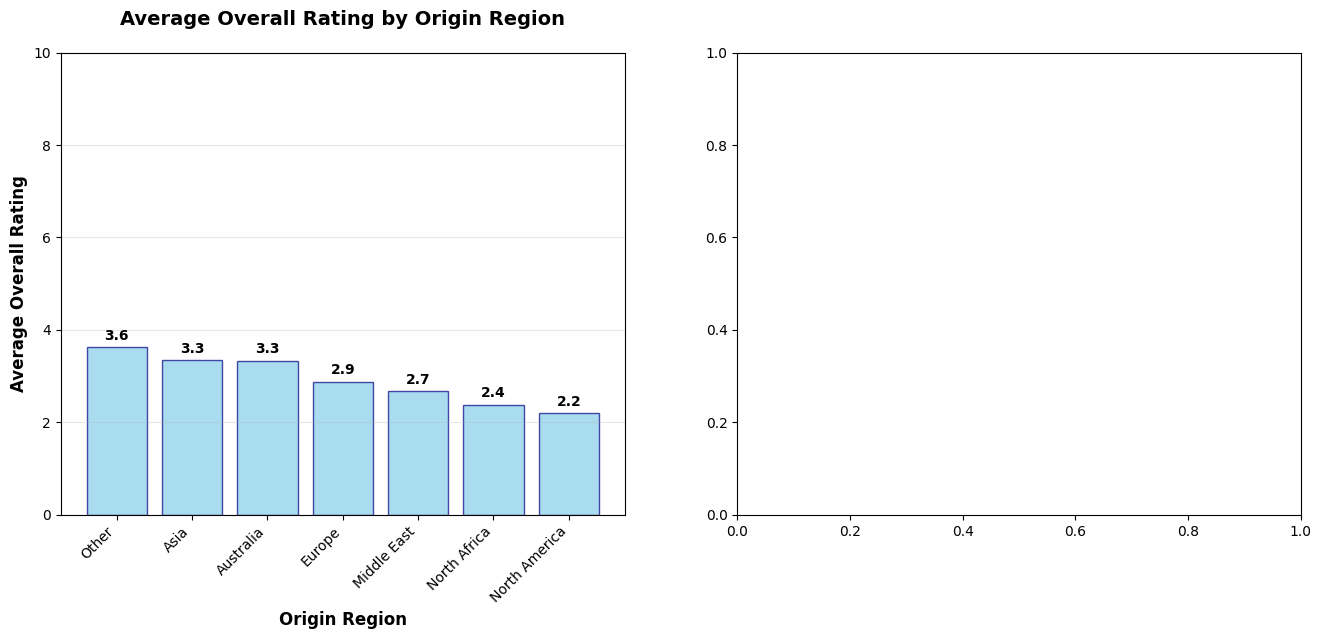

In [9]:
# Plot simple bar charts for average Overall Rating by Region and Travel Class
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")

# Convert Overall_Rating to numeric, handling any non-numeric values
df_clean['Overall_Rating_Numeric'] = pd.to_numeric(df_clean['Overall_Rating'], errors='coerce')

print("📊 CREATING BAR CHARTS FOR AVERAGE OVERALL RATING")
print("=" * 60)

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. Average Overall Rating by Region
print("🌍 Chart 1: Average Overall Rating by Region")
region_ratings = df_clean.groupby('Origin_Region')['Overall_Rating_Numeric'].agg(['mean', 'count']).round(2)
region_ratings = region_ratings[region_ratings['count'] >= 50]  # Filter regions with at least 50 reviews
region_ratings = region_ratings.sort_values('mean', ascending=False)

# Create bar chart for regions
bars1 = ax1.bar(range(len(region_ratings)), region_ratings['mean'], 
                color='skyblue', edgecolor='navy', alpha=0.7)
ax1.set_xlabel('Origin Region', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Overall Rating', fontsize=12, fontweight='bold')
ax1.set_title('Average Overall Rating by Origin Region', fontsize=14, fontweight='bold', pad=20)
ax1.set_xticks(range(len(region_ratings)))
ax1.set_xticklabels(region_ratings.index, rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim(0, 10)

# Add value labels on bars
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# 2. Average Overall Rating by Travel Class (Seat Type)
print("✈️ Chart 2: Average Overall Rating by Travel Class")
travel_class_ratings = df_clean.groupby('Seat_Type')['Overall_Rating_Numeric'].agg(['mean', 'count']).round(2)
travel_class_ratings = travel_class_ratings[travel_class_ratings['count'] >= 50]  # Filter classes with at least 50 reviews
travel_class_ratings = travel_class_ratings.sort_values('mean', ascending=False)

# Create bar chart for travel classes
bars2 = ax2.bar(range(len(travel_class_ratings)), travel_class_ratings['mean'], 
                color='lightcoral', edgecolor='darkred', alpha=0.7)
ax2.set_xlabel('Travel Class (Seat Type)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Overall Rating', fontsize=12, fontweight='bold')
ax2.set_title('Average Overall Rating by Travel Class', fontsize=14, fontweight='bold', pad=20)
ax2.set_xticks(range(len(travel_class_ratings)))
ax2.set_xticklabels(travel_class_ratings.index, rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim(0, 10)

# Add value labels on bars
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print summary statistics
print("\n📈 SUMMARY STATISTICS:")
print("=" * 40)

print("\n🌍 Average Rating by Region:")
print("-" * 30)
for region, data in region_ratings.iterrows():
    print(f"{region:15}: {data['mean']:.2f} (n={data['count']:,})")

print("\n✈️ Average Rating by Travel Class:")
print("-" * 35)
for travel_class, data in travel_class_ratings.iterrows():
    print(f"{travel_class:15}: {data['mean']:.2f} (n={data['count']:,})")

# Additional insights
print("\n🔍 KEY INSIGHTS:")
print("-" * 20)
best_region = region_ratings.index[0]
worst_region = region_ratings.index[-1]
best_class = travel_class_ratings.index[0]
worst_class = travel_class_ratings.index[-1]

print(f"• Highest rated region: {best_region} ({region_ratings.loc[best_region, 'mean']:.2f}/10)")
print(f"• Lowest rated region: {worst_region} ({region_ratings.loc[worst_region, 'mean']:.2f}/10)")
print(f"• Highest rated travel class: {best_class} ({travel_class_ratings.loc[best_class, 'mean']:.2f}/10)")
print(f"• Lowest rated travel class: {worst_class} ({travel_class_ratings.loc[worst_class, 'mean']:.2f}/10)")

# Calculate rating spread
region_spread = region_ratings['mean'].max() - region_ratings['mean'].min()
class_spread = travel_class_ratings['mean'].max() - travel_class_ratings['mean'].min()

print(f"• Rating spread across regions: {region_spread:.2f} points")
print(f"• Rating spread across travel classes: {class_spread:.2f} points")

# Plot Average Overall Rating based on Route Type

In [11]:
# Plot simple bar chart for average Overall Rating by Route Type
import matplotlib.pyplot as plt
import seaborn as sns

print("📊 CREATING BAR CHART FOR AVERAGE OVERALL RATING BY ROUTE TYPE")
print("=" * 65)

# Create figure
plt.figure(figsize=(10, 6))

# Calculate average rating by route type
route_type_ratings = df_clean.groupby('RouteType')['Overall_Rating_Numeric'].agg(['mean', 'count']).round(2)
route_type_ratings = route_type_ratings[route_type_ratings['count'] >= 10]  # Filter route types with at least 10 reviews
route_type_ratings = route_type_ratings.sort_values('mean', ascending=False)

print("🚁 Route Type Rating Analysis:")
print("-" * 35)

# Create bar chart for route types
colors = ['lightgreen', 'orange', 'lightblue']
bars = plt.bar(range(len(route_type_ratings)), route_type_ratings['mean'], 
               color=colors[:len(route_type_ratings)], edgecolor='black', alpha=0.8, width=0.6)

plt.xlabel('Route Type', fontsize=12, fontweight='bold')
plt.ylabel('Average Overall Rating', fontsize=12, fontweight='bold')
plt.title('Average Overall Rating by Route Type\n(Short-haul vs Long-haul)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(range(len(route_type_ratings)), route_type_ratings.index)
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, 10)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Add sample size below each bar
for i, (route_type, data) in enumerate(route_type_ratings.iterrows()):
    plt.text(i, -0.5, f'n={data["count"]:,}', ha='center', va='top', 
             fontsize=10, style='italic', color='gray')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n📈 ROUTE TYPE RATING SUMMARY:")
print("-" * 40)
for route_type, data in route_type_ratings.iterrows():
    print(f"{route_type:12}: {data['mean']:.2f}/10 (n={data['count']:,} reviews)")

# Statistical comparison
if len(route_type_ratings) >= 2:
    print("\n🔍 ROUTE TYPE INSIGHTS:")
    print("-" * 25)
    
    best_route = route_type_ratings.index[0]
    worst_route = route_type_ratings.index[-1]
    rating_difference = route_type_ratings.loc[best_route, 'mean'] - route_type_ratings.loc[worst_route, 'mean']
    
    print(f"• Best rated route type: {best_route} ({route_type_ratings.loc[best_route, 'mean']:.2f}/10)")
    print(f"• Lowest rated route type: {worst_route} ({route_type_ratings.loc[worst_route, 'mean']:.2f}/10)")
    print(f"• Rating difference: {rating_difference:.2f} points")
    
    # Check if short-haul vs long-haul
    short_haul_rating = route_type_ratings.loc['Short-haul', 'mean'] if 'Short-haul' in route_type_ratings.index else None
    long_haul_rating = route_type_ratings.loc['Long-haul', 'mean'] if 'Long-haul' in route_type_ratings.index else None
    
    if short_haul_rating is not None and long_haul_rating is not None:
        if short_haul_rating > long_haul_rating:
            print(f"• Short-haul flights rated {short_haul_rating - long_haul_rating:.2f} points higher than long-haul")
        else:
            print(f"• Long-haul flights rated {long_haul_rating - short_haul_rating:.2f} points higher than short-haul")
    
    # Calculate total coverage
    total_route_reviews = route_type_ratings['count'].sum()
    total_reviews = len(df_clean[df_clean['Overall_Rating_Numeric'].notna()])
    coverage = (total_route_reviews / total_reviews) * 100
    print(f"• Route type classification coverage: {coverage:.1f}% of all reviews")

print(f"\n✅ Route type rating analysis completed!")

📊 CREATING BAR CHART FOR AVERAGE OVERALL RATING BY ROUTE TYPE


KeyError: 'RouteType'

<Figure size 1000x600 with 0 Axes>